# Задача

Применить метод SWAHE для увеличения констрастности изображения

# Описание алгоритма

По исходному черно-белому изображению перемещается окно. В данном окне применяется метод CLAHE. Результат CLAHE записывается в выходное черно-белое изображение. При этом, окно располагается так, чтобы не выходить за границы изображения.

![SWAEH%20window.png](SWAEHwindow.png)

1. Большой прямоугольник -- все изображение;
2. Синий квадрат -- окно SWAHE;
3. Зеленый прямоугольник -- зона в пределах которой пермещаяется центр окна;
4. Красная зона -- зона в которй также применяется SWAHE, однако центр окна SWAHE в этой зоне не проходит.

# Анализ результатов

## Исходное изображение

![clahe_1.jpg](clahe_1.jpg)

## Изображение после применения CLAHE

![clahe.jpg](clahe.jpg)

## Изображение после применения SWAHE

![newpic.jpg](newpic.jpg)

# Исходный код

## Используемые библиотеки

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
import time

## Код алгоритма

In [34]:


def SWAHE(
    img,  # входное изображение
    r,  # радиус окна SWAHE
    show_progress  # флаг, конфигурирующий параметры вспомогательного вывода
):
    clahe = cv2.createCLAHE(clipLimit=2.0)

    height = img.shape[0]
    width = img.shape[1]

    full = (height-2*r)*(width-2*r)

    if show_progress:
        print ('start')  # вспомогательный вывод (1)

    count = 0
    step_to_show = 1
    d = r

    new_pic = np.zeros((height, width))

    for h in range(r, height-r, int(r/d)):
        for w in range(r, width-r, int(r/d)):

            count += 1

            if show_progress:
                # начало вспомогателного вывода (2)
                step = (h-r)*(width-2*r)+(w-r) 
                sys.stdout.flush()
                sys.stdout.write('{} / {} % ({}/{})\r'.format(
                    int(step/(full-1) * 100),
                    100,
                    step,
                    full))
                # конец вспомогательного вывода (2)

            left_up_h = h-r
            left_up_w = w-r
            right_down_h = h+r
            right_down_w = w+r

            if left_up_h < 0:
                left_up_h = 0
            if left_up_w < 0:
                left_up_w = 0
            if right_down_h < 0:
                right_down_h = 0
            if right_down_w < 0:
                right_down_w = 0

            if left_up_h > height-1:
                left_up_h = height-1
            if left_up_w > width-1:
                left_up_w = width-1
            if right_down_h > height-1:
                right_down_h = height-1
            if right_down_w > width-1:
                right_down_w = width-1

            sl = img[left_up_h:right_down_h, left_up_w:right_down_w]
            sl = clahe.apply(sl)
            new_pic[left_up_h:right_down_h, left_up_w:right_down_w] = sl[:]
    if show_progress:
        print ('')
        print ('done')
    return new_pic
    

 # Пример использования

## Входные данные

In [35]:
image_path = 'clahe_1.jpg'   # путь до исходного изображения
r = 100   # радиус окна SWAHE
show_progress = True  # флаг, конфигурирующий параметры вспомогательного вывода
output_mode = 0  # задать способ показа результата работы алгоритма (0 -- в ноутбуке, 1 -- записать в файл)
result_name = 'result.jpg'  # название выходного файла

## Применение

start
100 / 100 % (34361/34362)
done


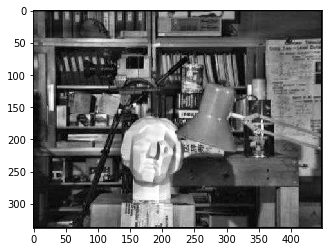

In [36]:
img = np.array(cv2.imread(image_path, 0))  # считывание исходного изображения (путь относительно корня директории)
new_pic = SWAHE(img, r, show_progress)  # применение адгоритма
if output_mode == 0:
    plt.imshow(new_pic, cmap='gray')          # вывод резульатата работы алгоритм0а
    plt.show()
elif output_mode == 1:
    cv2.imwrite(result_name, new_pic)          # вывод резульатата работы алгоритма